d:\programming\Python\image_segmentation\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Seed set to 42
Some weights of SegformerForSemanticSegmentation were not initialized from the model checkpoint at nvidia/segformer-b0-finetuned-ade-512-512 and are newly initialized because the shapes did not match:
- decode_head.classifier.bias: found shape torch.Size([150]) in the checkpoint and torch.Size([1]) in the model instantiated
- decode_head.classifier.weight: found shape torch.Size([150, 256, 1, 1]) in the checkpoint and torch.Size([1, 256, 1, 1]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the d

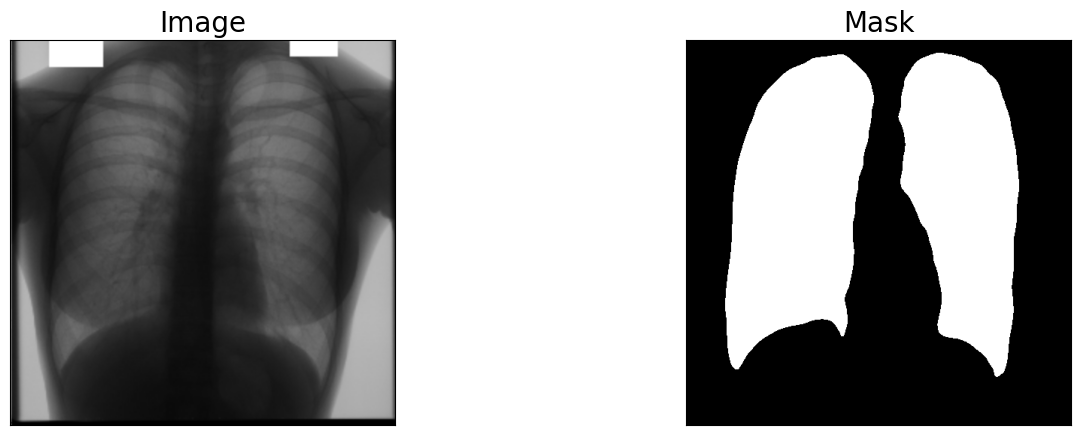

predicted: ..\data\test\img\case235.bmp


In [ ]:
from pathlib import Path
import torch

from image_segmentation.predict import predict

# モデルディレクトリとテスト画像のパスを指定
model_dir = Path("./../model")
test_image = Path("./../data/test/img/case235.bmp")

device = "cuda" if torch.cuda.is_available() else "cpu"

# 推論を実行（最初の1枚を可視化）
results = predict(
    image_path_or_dir=test_image,
    model_dir=model_dir,
    device=device,
    visualize_result=True,
    threshold=0.4,
)

# 結果の中身を軽く確認
for path, img, mask in results:
    print(f"predicted: {path}")
    break